Ex1 
--

Bayes 
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$$

Likelihood: $P(D \mid W)$ => maximum Likelihood
=> minimize Loss function $$L = \sum_{i=1}^{N}(y(x,w) - t)^2 =\parallel t - XW \parallel ^2$$
$$=> W = (X^TX)^{-1} X^T t$$

$P(W \mid D) =>$ minimize Loss function
$$L2 = \sum_{i=1}^{N}(t- y(x, w))^2 + \lambda W^TW = \parallel XW - t  \parallel ^2_2 + \lambda \parallel W \parallel ^2_2 \tag{1}$$
$$=> W = (X^T X + \lambda I_n)^{-1}X^T t  \tag{2}$$


Proof (1)

$P(W \mid D) = \frac{P(D \mid W) P(W)}{P(D)}$

posterior = $\frac{likelihood \times prior}{envidence}$

=>$$P(w \mid x, t, \alpha) = \frac{P(t \mid x, w) P(w \mid \alpha)}{P(x, t, \alpha)}$$
$P(w \mid \alpha) = N(w \mid 0, \alpha^{-1}, I)$

=> Maximum posterior => Maximum A = $P(t \mid x, w) P(w \mid \alpha)$
$$ln(A) = ln(P(t \mid x, w) P(w \mid \alpha))$$
$$= ln(P(t \mid x, w)) + ln(P(w \mid \alpha))$$

Ex2
--

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234)

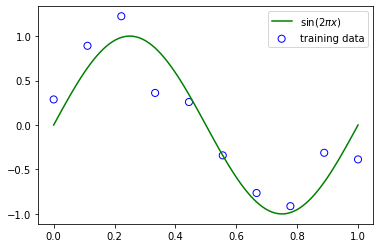

In [ ]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [ ]:
print(x_val, y_val)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [-0.05066158  0.47879527  1.0331631   1.00438513  0.67155803 -0.45934646
 -0.69713688 -1.43906456 -0.68856474  0.2647423 ]


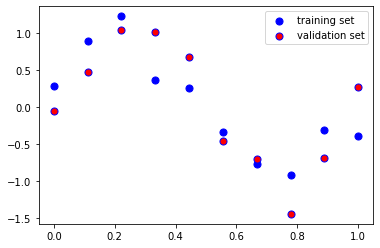

In [ ]:
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=50, label="training set")
plt.scatter(x_val, y_val, facecolor="red", edgecolor="b", s=50, label="validation set")
plt.legend()
plt.show()


In [ ]:
def concatenate(x):
  i = np.ones(len(x)).reshape(-1,1)
  x = np.concatenate((i, x.reshape(-1,1)), axis = 1)
  return x

def cal_w(x, y):
  a = np.dot(x.T, x)
  b = np.dot(x.T, y)
  w = np.dot(np.linalg.pinv(a), b)
  return w

def cal_mse(y, predict):
  return 1/len(y) * np.sum((predict - y)**2)

def predict(x, w):
  return np.dot(x,w)


In [ ]:
# bac 1
X_train_1 = concatenate(x_train)
X_val_1 = concatenate(x_val)
w_1 = cal_w(X_train_1, y_train)
pred_train_1 = predict(X_train_1, w_1)
pred_val_1 = predict(X_val_1, w_1)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train_1),
        cal_mse(y_val, pred_val_1)))

# mse trên tập training và validation đều nhỏ 
# underfitting

mse in training set 0.17671134464447244 
mse in validation set 0.44203911312123606


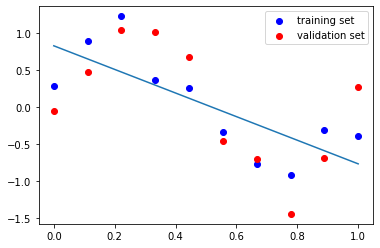

In [ ]:
plt.plot(x_train,pred_train_1)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

In [ ]:
#bac 3 
x2 = np.power(x_train, 2).reshape(-1,1)
x3 = np.power(x_train, 3).reshape(-1,1)
x_3 = np.concatenate((x_train.reshape(-1,1), x2, x3), axis = 1)

X_train_3 = np.concatenate((np.ones(len(x_3)).reshape(-1,1),x_3),axis = 1)

x2_val = np.power(x_val, 2).reshape(-1,1)
x3_val = np.power(x_val, 3).reshape(-1,1)
x_3_val = np.concatenate((x_val.reshape(-1,1), x2_val, x3_val), axis = 1)

X_val_3 = np.concatenate((np.ones(len(x_3_val)).reshape(-1,1), x_3_val), axis = 1)

In [ ]:
w_3 = cal_w(X_train_3, y_train)
pred_train_3 = predict(X_train_3, w_3)
pred_val_3 = predict(X_val_3, w_3)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train_3),
        cal_mse(y_val, pred_val_3)))

# mse 2 tập tốt

mse in training set 0.044885441714595825 
mse in validation set 0.12715843745290456


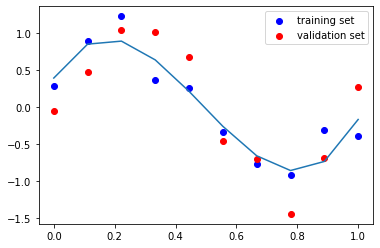

In [ ]:
plt.plot(x_train,pred_train_3)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

In [ ]:
#bac 9 
x2 = np.power(x_train, 2).reshape(-1,1)
x3 = np.power(x_train, 3).reshape(-1,1)
x4 = np.power(x_train, 4).reshape(-1,1)
x5 = np.power(x_train, 5).reshape(-1,1)
x6 = np.power(x_train, 6).reshape(-1,1)
x7 = np.power(x_train, 7).reshape(-1,1)
x8 = np.power(x_train, 8).reshape(-1,1)
x9 = np.power(x_train, 9).reshape(-1,1)

X_train_9 = np.concatenate((np.ones(len(x_train)).reshape(-1,1),
                            x_train.reshape(-1,1), x2, x3,
                            x4, x5, x6, x7, x8, x9),axis = 1)
X_train_9

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

In [ ]:
x2_val = np.power(x_val, 2).reshape(-1,1)
x3_val = np.power(x_val, 3).reshape(-1,1)
x4_val = np.power(x_val, 4).reshape(-1,1)
x5_val = np.power(x_val, 5).reshape(-1,1)
x6_val = np.power(x_val, 6).reshape(-1,1)
x7_val = np.power(x_val, 7).reshape(-1,1)
x8_val = np.power(x_val, 8).reshape(-1,1)
x9_val = np.power(x_val, 9).reshape(-1,1)

X_val_9 = np.concatenate((np.ones(len(x_val)).reshape(-1,1),
                            x_val.reshape(-1,1), x2_val, x3_val,
                            x4_val, x5_val, x6_val, x7_val, x8_val, x9_val),axis = 1)
X_val_9

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

In [ ]:
w_9 = cal_w(X_train_9, y_train)
pred_train_9 = predict(X_train_9, w_9)
pred_val_9 = predict(X_val_9, w_9)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train_9),
        cal_mse(y_val, pred_val_9)))

#mse trên training ~ 0 trong khí validation lại lớn hơn nhiều
# overfitting

mse in training set 1.46930919960844e-08 
mse in validation set 0.14970690307356901


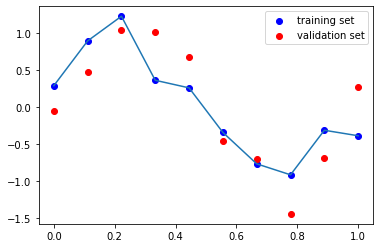

In [ ]:
plt.plot(x_train,pred_train_9)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

Ex3
---

In [ ]:
x_train_100, y_train_100 = create_toy_data(func, 110, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

In [ ]:
#bac 9 
x2_ = np.power(x_train_100, 2).reshape(-1,1)
x3_ = np.power(x_train_100, 3).reshape(-1,1)
x4_ = np.power(x_train_100, 4).reshape(-1,1)
x5_ = np.power(x_train_100, 5).reshape(-1,1)
x6_ = np.power(x_train_100, 6).reshape(-1,1)
x7_ = np.power(x_train_100, 7).reshape(-1,1)
x8_ = np.power(x_train_100, 8).reshape(-1,1)
x9_ = np.power(x_train_100, 9).reshape(-1,1)

X_train_9_100 = np.concatenate((np.ones(len(x_train_100)).reshape(-1,1),
                            x_train_100.reshape(-1,1), x2_, x3_,
                            x4_, x5_, x6_, x7_, x8_, x9_),axis = 1)
X_train_9_100

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.17431193e-03, 8.41679993e-05, ...,
        5.47034245e-15, 5.01866280e-17, 4.60427780e-19],
       [1.00000000e+00, 1.83486239e-02, 3.36671997e-04, ...,
        7.00203833e-13, 1.28477768e-14, 2.35739023e-16],
       ...,
       [1.00000000e+00, 9.81651376e-01, 9.63639424e-01, ...,
        8.78417457e-01, 8.62299706e-01, 8.46477693e-01],
       [1.00000000e+00, 9.90825688e-01, 9.81735544e-01, ...,
        9.37520565e-01, 9.28919459e-01, 9.20397262e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
X_val_9.shape

(10, 10)

In [ ]:
w_9_100 = cal_w(X_train_9_100, y_train_100)
w_9_100.shape

(10,)

In [ ]:
w_9_100 = cal_w(X_train_9_100, y_train_100)
pred_train_9_100 = predict(X_train_9_100, w_9_100)
pred_val_9_100 = predict(X_val_9, w_9_100)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train_100,pred_train_9_100),
        cal_mse(y_val, pred_val_9_100)))

# mse tren 2 tap training va validation da tot hon

mse in training set 0.05799577855259895 
mse in validation set 0.07639992459308484


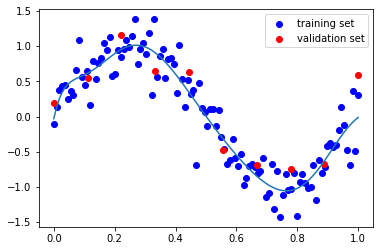

In [ ]:
plt.plot(x_train_100, pred_train_9_100)
plt.scatter(x_train_100, y_train_100, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

Ex 4
--

In [ ]:
x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

In [ ]:
x2 = np.power(x_train, 2).reshape(-1,1)
x3 = np.power(x_train, 3).reshape(-1,1)
x4 = np.power(x_train, 4).reshape(-1,1)
x5 = np.power(x_train, 5).reshape(-1,1)
x6 = np.power(x_train, 6).reshape(-1,1)
x7 = np.power(x_train, 7).reshape(-1,1)
x8 = np.power(x_train, 8).reshape(-1,1)
x9 = np.power(x_train, 9).reshape(-1,1)

X_train_9 = np.concatenate((np.ones(len(x_train)).reshape(-1,1),
                            x_train.reshape(-1,1), x2, x3,
                            x4, x5, x6, x7, x8, x9),axis = 1)
X_train_9

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

In [ ]:
def L2_cal_w(x, alpha, y):
  a = np.linalg.pinv((np.dot(x.T, x))+(alpha * np.identity(x.shape[0])))
  b = np.dot(x.T, y)
  return np.dot(a,b)

def cal_mse(y, predict):
  return 1/len(y) * np.sum((predict - y)**2)

def predict(x, w):
  return np.dot(x,w)

In [ ]:
L2_w = L2_cal_w(X_train_9, 0.001, y_train)
pred_train = predict(X_train_9, L2_w)
pred_val = predict(X_val_9, L2_w)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train),
        cal_mse(y_val, pred_val)))

mse in training set 0.045740718840115845 
mse in validation set 0.06587920703361365


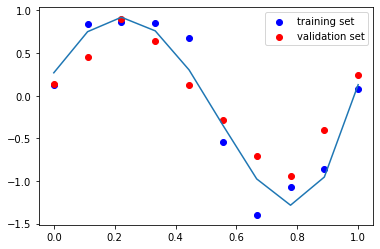

In [ ]:
plt.plot(x_train,pred_train)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

In [ ]:
train_loss = []
val_loss = []

for a in np.arange(0, 0.01, 0.0002):
  L2_w = L2_cal_w(X_train_9, a, y_train)
  pred_train = predict(X_train_9, L2_w)
  train_loss.append(cal_mse(y_train, pred_train))
  pred_val = predict(X_val_9, L2_w)
  val_loss.append(cal_mse(y_val, pred_val))



In [ ]:
train_loss

[3.1448654844175834e-08,
 0.032842949886497545,
 0.03560766151064939,
 0.03880586479987236,
 0.04223810568125337,
 0.045740718840115845,
 0.0492103954087837,
 0.05258637218509084,
 0.05583508242797788,
 0.05893992008883491,
 0.06189473618386818,
 0.06469974411897693,
 0.06735893964035135,
 0.06987847147454637,
 0.07226561209128296,
 0.07452811012413753,
 0.07667378719879032,
 0.07871029210032655,
 0.08064495651225143,
 0.08248471629614085,
 0.08423607486133602,
 0.08590509327547169,
 0.0874973970327695,
 0.08901819284812006,
 0.09047229112244091,
 0.09186413123593741,
 0.09319780783261605,
 0.09447709693151952,
 0.09570548114874007,
 0.09688617361315033,
 0.09802214035643175,
 0.09911612108759178,
 0.10017064834541863,
 0.10118806507457179,
 0.10217054070210681,
 0.10312008580834264,
 0.1040385654937863,
 0.10492771154547205,
 0.10578913350398307,
 0.10662432872783756,
 0.10743469154611907,
 0.10822152158371126,
 0.10898603133674825,
 0.10972935306930634,
 0.11045254509596195,
 0.11115

In [ ]:
val_loss

[0.12978647203322505,
 0.07053467882002483,
 0.0676494506717724,
 0.06624993858067317,
 0.06577166410685552,
 0.06587920703361365,
 0.06635986207153864,
 0.06707530890924449,
 0.0679341192436686,
 0.06887517808935754,
 0.06985735566727073,
 0.0708529122354811,
 0.07184319893316538,
 0.07281580523117345,
 0.07376263691200183,
 0.07467860362829587,
 0.07556071230466488,
 0.07640743466649007,
 0.07721826232825063,
 0.07799339169427028,
 0.07873349962717488,
 0.07943958315949777,
 0.08011284475303537,
 0.08075461017416258,
 0.08136626986198049,
 0.08194923729834504,
 0.08250491972743292,
 0.08303469786855183,
 0.08353991218561134,
 0.08402185393608809,
 0.0844817596972546,
 0.08492080841214986,
 0.08534012024889132,
 0.08574075675173277,
 0.08612372189822456,
 0.08648996377702844,
 0.08684037667577771,
 0.0871758034239486,
 0.08749703787746688,
 0.08780482746191015,
 0.0880998757154572,
 0.08838284478920588,
 0.08865435787570328,
 0.08891500154666752,
 0.08916532798691015,
 0.0894058571181

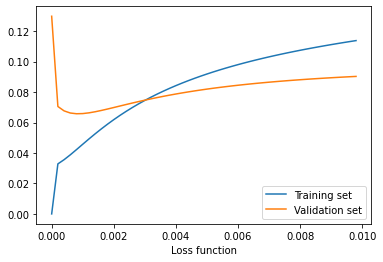

In [ ]:
plt.plot(np.arange(0, 0.01, 0.0002), train_loss, label = 'Training set')
plt.plot(np.arange(0, 0.01, 0.0002), val_loss, label = 'Validation set')
plt.xlabel('Loss function')
plt.legend()
plt.show()

In [230]:
%cd /content/drive/MyDrive/ML/Machine_Learning_DSEB/Machine-Learning-with-Python

/content/drive/MyDrive/ML/Machine_Learning_DSEB/Machine-Learning-with-Python


In [ ]:
!git config --global user.email "anhnm.cap@gmail.com"
!git config --global user.name "anhnm"

In [231]:
!git add -A

In [232]:
!git commit -m "add Ex1" 

[main 4e14e75] add Ex1
 2 files changed, 2 insertions(+), 2 deletions(-)


In [ ]:
!git push